In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, Tensor
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms

In [31]:
from torchvision import datasets, transforms
import torch

batch_size=64

digit = 8  # chiffre sur lequel tu veux entraîner
transform = transforms.Compose([transforms.ToTensor()])

mnist_full = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
indices = [i for i, label in enumerate(mnist_full.targets) if label == digit]
mnist_digit = torch.utils.data.Subset(mnist_full, indices)

train_loader = torch.utils.data.DataLoader(mnist_digit, batch_size, shuffle=True)


In [3]:
len(indices)

6131

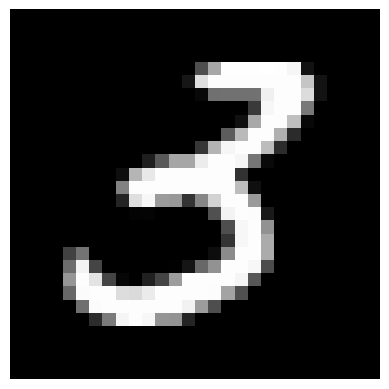

In [4]:
img, label = mnist_digit[80]  # décompose le tuple
plt.imshow(img.squeeze(), cmap="gray")
plt.axis('off')
plt.show()

In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [6]:
import CNN1 as CNN1
model = CNN1.CNN1()


In [7]:
n_epochs = 10000

optim = torch.optim.Adam(model.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)
model = model.to(device)

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

/opt/campux/virtualenv/deeplearning-u24/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


epoch 0 | loss = 1.1179
epoch 100 | loss = 0.4351
epoch 200 | loss = 0.3271
epoch 300 | loss = 0.3044
epoch 400 | loss = 0.2805
epoch 500 | loss = 0.2320
epoch 600 | loss = 0.2175
epoch 700 | loss = 0.2444
epoch 800 | loss = 0.2516
epoch 900 | loss = 0.2342
epoch 1000 | loss = 0.2038
epoch 1100 | loss = 0.1758
epoch 1200 | loss = 0.1734
epoch 1300 | loss = 0.1732
epoch 1400 | loss = 0.2375
epoch 1500 | loss = 0.2102
epoch 1600 | loss = 0.1952
epoch 1700 | loss = 0.1961
epoch 1800 | loss = 0.1851
epoch 1900 | loss = 0.1724
epoch 2000 | loss = 0.1679
epoch 2100 | loss = 0.1706
epoch 2200 | loss = 0.1832
epoch 2300 | loss = 0.1611
epoch 2400 | loss = 0.1691
epoch 2500 | loss = 0.1651
epoch 2600 | loss = 0.1664
epoch 2700 | loss = 0.1480
epoch 2800 | loss = 0.1641
epoch 2900 | loss = 0.1541
epoch 3000 | loss = 0.1676
epoch 3100 | loss = 0.1611
epoch 3200 | loss = 0.1589
epoch 3300 | loss = 0.1663
epoch 3400 | loss = 0.1589
epoch 3500 | loss = 0.2028
epoch 3600 | loss = 0.1545
epoch 3700 | 

In [8]:
import torch

def generate_image(model, steps=100, device="cuda"):

    x_t = torch.randn(1, 1, 28, 28, device=device)

    dt = 1.0 / steps
    
    for step in range(steps):
        t = torch.tensor([[1.0 - step*dt]], device=device)  # t décroissant de 1 à 0
        v = model(x_t, t)
        x_t = x_t + dt * v  
    
    x_gen = torch.clip(x_t, 0.0, 1.0)
    return x_gen


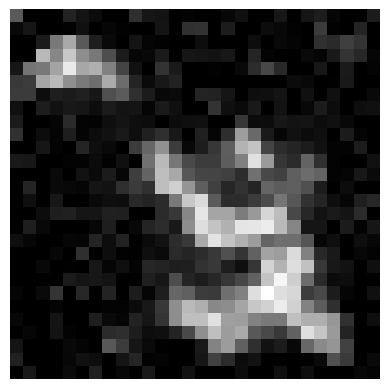

In [9]:
model = model.to(device)
x_gen = generate_image(model)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [10]:
import UNET as UNET


model2 = UNET.UNet4()

In [11]:
n_epochs = 5000
model2 = model2.to(device)

optim = torch.optim.Adam(model2.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)


for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model2(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 200 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.0976
epoch 200 | loss = 0.3791
epoch 400 | loss = 0.2850
epoch 600 | loss = 0.2322
epoch 800 | loss = 0.2351
epoch 1000 | loss = 0.2660
epoch 1200 | loss = 0.1789
epoch 1400 | loss = 0.1842
epoch 1600 | loss = 0.1731
epoch 1800 | loss = 0.1778
epoch 2000 | loss = 0.1323
epoch 2200 | loss = 0.1713
epoch 2400 | loss = 0.1860
epoch 2600 | loss = 0.1693
epoch 2800 | loss = 0.1402
epoch 3000 | loss = 0.1472
epoch 3200 | loss = 0.1771
epoch 3400 | loss = 0.1441
epoch 3600 | loss = 0.1261
epoch 3800 | loss = 0.1495
epoch 4000 | loss = 0.1260
epoch 4200 | loss = 0.1454
epoch 4400 | loss = 0.1436
epoch 4600 | loss = 0.1215
epoch 4800 | loss = 0.1211


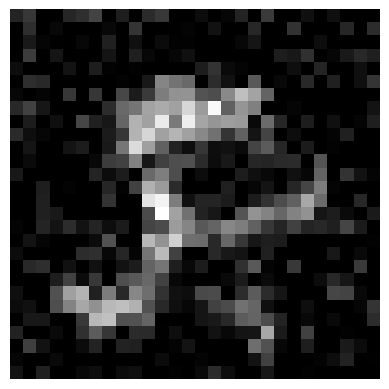

In [12]:
x_gen = generate_image(model2)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [32]:
import UNET2 as UNET2


model3 = UNET2.UNetEnhanced()

In [33]:
n_epochs = 2000
model3 = model3.to(device)

optim = torch.optim.Adam(model3.parameters(), lr=0.001) 

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model3(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.2127
epoch 100 | loss = 0.1575
epoch 200 | loss = 0.1550
epoch 300 | loss = 0.1385
epoch 400 | loss = 0.1231
epoch 500 | loss = 0.1207
epoch 600 | loss = 0.1229
epoch 700 | loss = 0.1069
epoch 800 | loss = 0.1039
epoch 900 | loss = 0.1109
epoch 1000 | loss = 0.1123
epoch 1100 | loss = 0.1116
epoch 1200 | loss = 0.1113
epoch 1300 | loss = 0.1014
epoch 1400 | loss = 0.0993
epoch 1500 | loss = 0.1012
epoch 1600 | loss = 0.1235
epoch 1700 | loss = 0.1088
epoch 1800 | loss = 0.1028
epoch 1900 | loss = 0.0967


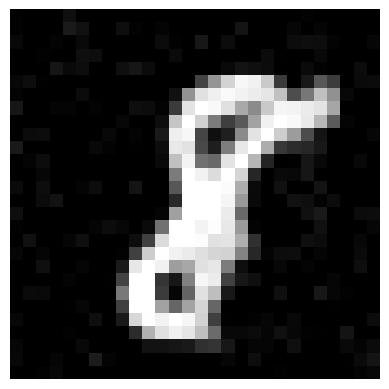

In [34]:
x_gen = generate_image(model3)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

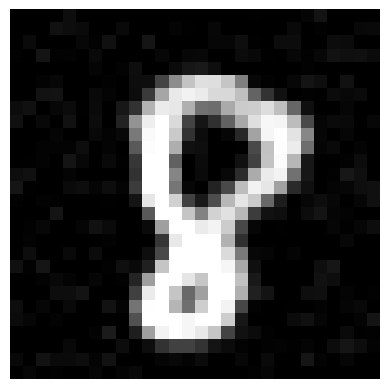

In [42]:
x_gen = generate_image(model3)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()